In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# 주의할 점은 테스트 데이터의 표준화는 학습 데이터의 평균과 표준편차를 사용해야 한다는 점입니다.
test_data -= mean
test_data /= std

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers, Input

# 모델 구성
input = Input(shape=(train_data.shape[1],))
x = layers.Dense(64, activation='relu')(input)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1)(x)  # 회귀(예측)을 위한 레이어이므로 활성화 함수는 사용하지 않습니다.

# 모델 인스턴스 생성
model = models.Model(inputs=input, outputs=output)

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다. 
# 모델 학습
history = model.fit(train_data, train_labels, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
21/21 [==============================] - 10s 9ms/step - loss: 525.6876 - mae: 20.9472 - val_loss: 532.4402 - val_mae: 21.2082
Epoch 2/20
21/21 [==============================] - 0s 4ms/step - loss: 409.5938 - mae: 18.1189 - val_loss: 390.4628 - val_mae: 17.8313
Epoch 3/20
21/21 [==============================] - 0s 3ms/step - loss: 278.5470 - mae: 14.4875 - val_loss: 256.0200 - val_mae: 13.8774
Epoch 4/20
21/21 [==============================] - 0s 4ms/step - loss: 155.8296 - mae: 10.2978 - val_loss: 126.0741 - val_mae: 8.7737
Epoch 5/20
21/21 [==============================] - 0s 3ms/step - loss: 71.3337 - mae: 6.3888 - val_loss: 64.5875 - val_mae: 5.6406
Epoch 6/20
21/21 [==============================] - 0s 4ms/step - loss: 41.5350 - mae: 4.6358 - val_loss: 40.7205 - val_mae: 4.5784
Epoch 7/20
21/21 [==============================] - 0s 3ms/step - loss: 30.2363 - mae: 3.9084 - val_loss: 32.4146 - val_mae: 4.0679
Epoch 8/20
21/21 [==============================] - 0s 3ms/s

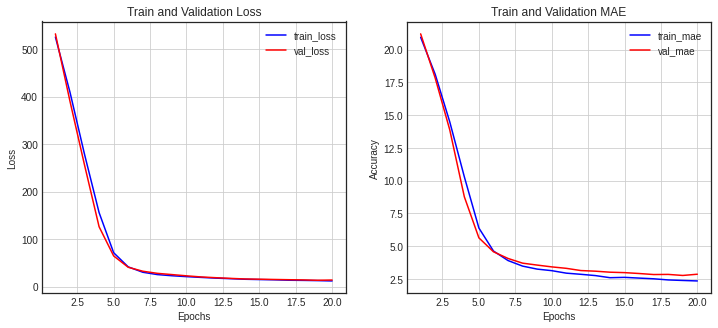

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# 모델 평가
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print("Test MSE:", test_mse_score)
print("Test MAE:", test_mae_score)


4/4 [==============================] - 0s 2ms/step - loss: 22.1888 - mae: 3.3069
Test MSE: 22.188844680786133
Test MAE: 3.3069183826446533
